# Terrestrial Hydrology Fall 2024 - Aerial averages and mapping

Hi everyone! This is our second python excercise. Just as last time, you will complete these assignments with a mix of responses as code and narrative text within this jupyter notebook document. To complete the assignment, go to File > Print Preview, and export as a PDF (.pdf file) before uploading the assignment to Gradescope. 

Look for triple @@@ signs in places where we expect you to write code or respond to a question. 
The rest of the notebook should not require modification. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import dates
import matplotlib.dates as mdates
import scipy
from scipy.interpolate import griddata

## [1] Import Rainfall data 
* In this lab, we will be uploading yearly rainfall data from 9 UC Natural Reserves system. The list of stations we will use is the following: Bodega, Point Reyes, McLaughlin, Jepson, Blue Oak Ranch, Ano Nuevo, Younger, Yosemite Mariposa Grove, and WhiteMt Barcroft. We will clean up the data, import the latitudes and longitudes of these stations and then do some interpolation. 

* The following website: https://dendra.science/orgs/ucnrs is the repository for all 38 natural reserves managed by the University of California. The data you have been using in the first two Python labs came from this website, specifically from the Blue Oak Ranch Reserve (BORR), a reserve just south of San Jose! Most of the data is from meteorological stations located at each reserve, but additional data is sometimes available. 

We'll start by importing the data for Water Year 2022 as a Pandas DataFrame as we have been doing for the last two labs.

In [2]:
rain_data = pd.read_csv('WY_2022_Rainfall.csv') 

These data are every 10 minutes, similar to the datasets we have been using. Look at the table below to see that we have rain data for a variety of stations. 

In [3]:
print(rain_data)

                Time  Año Nuevo Rainfall mm  Blue Oak Ranch Rainfall mm  \
0      10/1/22 00:00                    0.0                         0.0   
1      10/1/22 00:10                    0.0                         0.0   
2      10/1/22 00:20                    0.0                         0.0   
3      10/1/22 00:30                    0.0                         0.0   
4      10/1/22 00:40                    0.0                         0.0   
...              ...                    ...                         ...   
52555  9/30/23 23:10                    0.0                         0.0   
52556  9/30/23 23:20                    0.0                         0.0   
52557  9/30/23 23:30                    0.0                         0.0   
52558  9/30/23 23:40                    0.0                         0.0   
52559  9/30/23 23:50                    0.0                         0.0   

       Bodega Rainfall mm  Jepson Rainfall mm  McLaughlin Rainfall mm  \
0                     0.0 

## [2] Make yearly data
Now we are going to generate yearly rainfall. Because the water year straddles two years, we can't use the "group.by" function we used last time. Below, use the dataframe "sum" function to add together all of the precipitation over the water year (at all of the stations in the CSV). 

In [4]:
rain_data_yearly_sum = rain_data.sum()

To prepare the data for the next step, we will now bring the data back into the dataframe format by applying the "to_frame" function as follows:

In [5]:
rain_data_yearly_sum = rain_data_yearly_sum.to_frame()

Print the data to look at it with the yearly sums:

In [6]:
rain_data_yearly_sum

,0
Time,10/1/22 00:0010/1/22 00:1010/1/22 00:2010/1/22...
Año Nuevo Rainfall mm,1019.81
Blue Oak Ranch Rainfall mm,1019.302
Bodega Rainfall mm,1147.068
Jepson Rainfall mm,639.318
McLaughlin Rainfall mm,974.852
Point Reyes Rainfall mm,1726.478
WhiteMt Barcroft Rainfall mm,179.578
Yosemite Mariposa Grove Rainfall mm,1209.296
Younger Rainfall mm,756.92


# [3] Download location 
## Go to https://dendra.science/orgs/ucnrs/stations: this is the list of stations available. Click on each of the 9 stations we are using to find the latitude and longitude coordinates of each station. Edit the 'WY_2022_Locations.csv' file with the information you find.

Load the coordinate data and print the dataframe

In [7]:
coordinate_data = pd.read_csv('WY_2022_Locations_with_data.csv')
coordinate_data

,Coordinates,Año Nuevo Rainfall mm,Blue Oak Ranch Rainfall mm,Bodega Rainfall mm,Jepson Rainfall mm,McLaughlin Rainfall mm,Point Reyes Rainfall mm,WhiteMt Barcroft Rainfall mm,Yosemite Mariposa Grove Rainfall mm,Younger Rainfall mm
0,Latitude,37.126217,37.381666,38.31388,38.2679,38.82416,37.969722,37.58305,37.512636,36.948889
1,Longitude,-122.333746,-121.736380,-123.06020,-121.8278,-122.33500,-122.731667,-118.23722,-119.605092,-122.066389


As you can see, your "Coordinate" dataframe is horizontal, whereas your "rainfall" data is vertical. You can easily fix this by transposing the matrix using ".T" at the end of your dataframe (which stands for "transpose"). 

In [8]:
coordinate_data = coordinate_data.T

Print the dataframe to check it's now in the vertically-stacked direction. 

In [9]:
coordinate_data

,0,1
Coordinates,Latitude,Longitude
Año Nuevo Rainfall mm,37.126217,-122.333746
Blue Oak Ranch Rainfall mm,37.381666,-121.73638
Bodega Rainfall mm,38.31388,-123.0602
Jepson Rainfall mm,38.2679,-121.8278
McLaughlin Rainfall mm,38.82416,-122.335
Point Reyes Rainfall mm,37.969722,-122.731667
WhiteMt Barcroft Rainfall mm,37.58305,-118.23722
Yosemite Mariposa Grove Rainfall mm,37.512636,-119.605092
Younger Rainfall mm,36.948889,-122.066389


The headers are a bit mixed up, let's fix this using the code below!

In [10]:
#grab the first row for the header
new_header = coordinate_data.iloc[0] 

#take the data less the header row
coordinate_data = coordinate_data[1:] 

# set the name of the columns to be the header we just grabbed
coordinate_data.columns = new_header 

Print the dataframe to check the headers are now fixed. 

In [11]:
print(coordinate_data)

Coordinates                           Latitude   Longitude
Año Nuevo Rainfall mm                37.126217 -122.333746
Blue Oak Ranch Rainfall mm           37.381666  -121.73638
Bodega Rainfall mm                    38.31388   -123.0602
Jepson Rainfall mm                     38.2679   -121.8278
McLaughlin Rainfall mm                38.82416    -122.335
Point Reyes Rainfall mm              37.969722 -122.731667
WhiteMt Barcroft Rainfall mm          37.58305  -118.23722
Yosemite Mariposa Grove Rainfall mm  37.512636 -119.605092
Younger Rainfall mm                  36.948889 -122.066389


**Question:** How would you explain the code that modified the headers? Write a sentence describing what the code did. 

**Answer:** (Here you can essentially summarize the comments from the code.) We made a variable called new_header from the first (0th) row of the dataframe. We then sliced the dataframe to only use rows 1 onwards (i.e. ignoring the 0th row, the header row). We then set the names of the columns of the data frames to be the names from new_header. 

# [5] Concatenate the coordinates and the rainfall data
Use the pandas concat() function to put the coordinates and rainfall data into one data frame. Make sure to use "axis = 1" to concatenate in the rigth direction!

In [12]:
rain_data_merged = pd.concat([coordinate_data, rain_data_yearly_sum], axis=1)

# Now we'll display the output: 
rain_data_merged

,Latitude,Longitude,0
Año Nuevo Rainfall mm,37.126217,-122.333746,1019.81
Blue Oak Ranch Rainfall mm,37.381666,-121.73638,1019.302
Bodega Rainfall mm,38.31388,-123.0602,1147.068
Jepson Rainfall mm,38.2679,-121.8278,639.318
McLaughlin Rainfall mm,38.82416,-122.335,974.852
Point Reyes Rainfall mm,37.969722,-122.731667,1726.478
WhiteMt Barcroft Rainfall mm,37.58305,-118.23722,179.578
Yosemite Mariposa Grove Rainfall mm,37.512636,-119.605092,1209.296
Younger Rainfall mm,36.948889,-122.066389,756.92
Time,NaN,NaN,10/1/22 00:0010/1/22 00:1010/1/22 00:2010/1/22...


# [6] Clean up data... again...

In [13]:
#the last row is set to be the header of the rainfall data frame, let's remove it
rain_data_merged = rain_data_merged[:-1]

#Let's rename the Rainfall column to "rainfall" instead of "0"
rain_data_merged = rain_data_merged.rename(columns = {0: 'Rainfall (mm)'})

# print the dataframe
rain_data_merged

,Latitude,Longitude,Rainfall (mm)
Año Nuevo Rainfall mm,37.126217,-122.333746,1019.81
Blue Oak Ranch Rainfall mm,37.381666,-121.73638,1019.302
Bodega Rainfall mm,38.31388,-123.0602,1147.068
Jepson Rainfall mm,38.2679,-121.8278,639.318
McLaughlin Rainfall mm,38.82416,-122.335,974.852
Point Reyes Rainfall mm,37.969722,-122.731667,1726.478
WhiteMt Barcroft Rainfall mm,37.58305,-118.23722,179.578
Yosemite Mariposa Grove Rainfall mm,37.512636,-119.605092,1209.296
Younger Rainfall mm,36.948889,-122.066389,756.92


# [7] Change data type
The resulting dataframe has the data stored as "objects", we need to turn the data into "float" to run the interpolation. Use the "astype()" function to do this.

In [14]:
rain_data_merged = rain_data_merged.astype(float)

# [8] Define plotting function
We have data with latitude and longitudes. So we should try to put it on a map! 

The function below will plot your data points over the interpolation maps that you will be getting. Look at each step to understand what each one does.

In [15]:
def my_plot_function(x,y,z,grid, buffer_lon, buffer_lat):
    # Decide on Figure dimension
    plt.figure(figsize=(10,8))
    
    #plot the interpolated map, with custom buffer around the sapec of teh datapoints we have (buffers)
    plt.imshow(grid, extent=(x.min()-buffer_lon, x.max()+buffer_lon, y.max()+buffer_lat,  y.min()-buffer_lat), cmap='rainbow', interpolation='gaussian')
    
    # plot the actual data points from the stations
    plt.scatter(x,y,c=z, cmap='rainbow', edgecolors='black')
    
    # Add a colorbar
    clb = plt.colorbar(orientation="horizontal")
    
    #Give a title to that colorbar
    clb.ax.set_title('Yearly rainfall amount (mm)',fontsize=12)

# [9] Define our grid for the interpolation!

In [16]:
# first we define some buffers, so that we make maps in an area slightly larger than the realm strictly defined by the coordinates of the stations
# these buffers are in degrees
buffer_lon = 0.5
buffer_lat = 0.5

This following cell defines a grid in which we will do the interpolation. We first need to define the length and width of our domain, then we split these into intervals (here 100 pixels in each direction), and then we create this 2D grid of latitudes and longitudes (xi and yi). This is somewhat technical, but try reading the code, keeping in mind that we're just trying to set up a map. 

In [17]:
# Define grid
Lon_dist = max(rain_data_merged['Longitude']) - min(rain_data_merged['Longitude'])*2*buffer_lon
Lat_dist = max(rain_data_merged['Latitude']) - min(rain_data_merged['Latitude'])+2*buffer_lat

nx, ny = round(Lon_dist*100), round(Lat_dist*100)

x = np.linspace(min(rain_data_merged['Longitude'])-buffer_lon, max(rain_data_merged['Longitude'])+buffer_lon, round(Lon_dist*100))
y = np.linspace(min(rain_data_merged['Latitude'])-buffer_lat, max(rain_data_merged['Latitude'])+buffer_lat, round(Lat_dist*100))

xi, yi = np.meshgrid(x,y)

# Linear interpolation

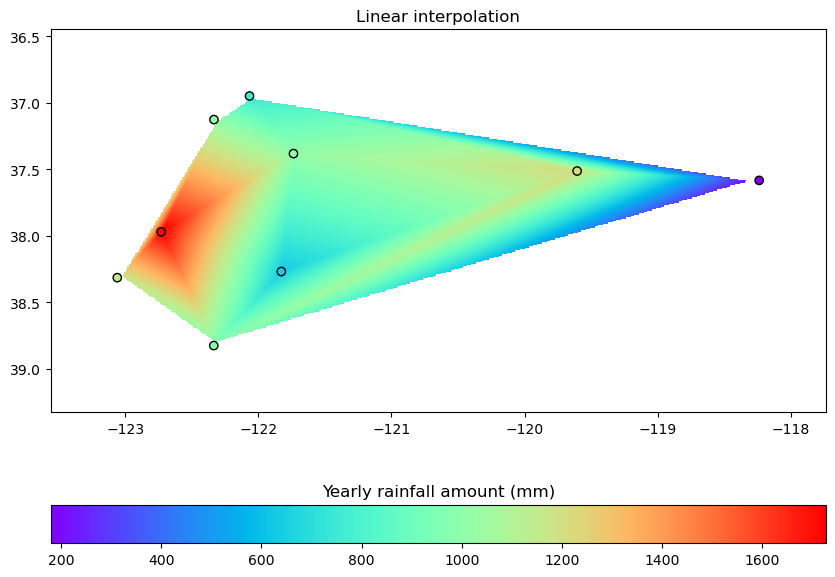

In [18]:
#Griddata takes in the coordinates and the values of the rainfall, and then the domain over which we want to interpolate (xi,yi) and the method
interpo_linear = griddata((rain_data_merged['Longitude'], rain_data_merged['Latitude']), rain_data_merged['Rainfall (mm)'], (xi, yi), method='linear')

#the interpolation comes out as a 1D array that we need to put back into a 2D array
interpo_linear  = interpo_linear.reshape((ny, nx))

#use our plotting function!
my_plot_function(rain_data_merged['Longitude'], rain_data_merged['Latitude'], rain_data_merged['Rainfall (mm)'],interpo_linear, buffer_lon, buffer_lat)
plt.title('Linear interpolation')
plt.show()

# Nearest neighbor
Now redo the exact same thing but for the nearest neighbor interpolation option of griddata. You need to change the "method" argument in the griddata() function to use nearest neighbor. 

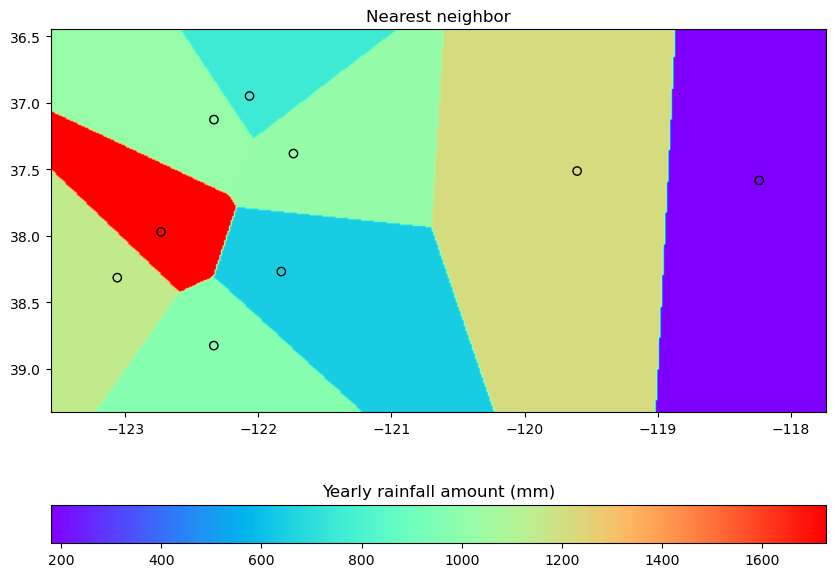

In [19]:
interpo_NN = griddata((rain_data_merged['Longitude'], rain_data_merged['Latitude']), rain_data_merged['Rainfall (mm)'], (xi, yi), method='nearest')
interpo_NN  = interpo_NN.reshape((ny, nx))
my_plot_function(rain_data_merged['Longitude'], rain_data_merged['Latitude'], rain_data_merged['Rainfall (mm)'],interpo_NN, buffer_lon, buffer_lat)
plt.title('Nearest neighbor')
plt.show()